<a href="https://colab.research.google.com/github/WhitneyMadafali/Water-Requirement-Prediction-for-Maize-using-KNN/blob/develop/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving xdata.csv to xdata.csv


In [ ]:
df = pd.read_csv('xdata.csv')

In [ ]:
df.head()

,SoilMoisture,temperature,Humidity,Irrigation
0,580,23,56,1
1,189,24,50,0
2,345,21,55,0
3,653,20,54,1
4,198,21,52,0


In [ ]:
df.tail()

,SoilMoisture,temperature,Humidity,Irrigation
997,675,25,19,1
998,210,23,17,0
999,398,25,18,0
1000,678,24,18,1
1001,201,21,14,0


In [ ]:
df.size

4008

In [ ]:
df.shape

(1002, 4)

In [ ]:
df.columns

Index(['SoilMoisture', 'temperature', 'Humidity', 'Irrigation'], dtype='object')

In [ ]:
df['Irrigation'].unique()

array([1, 0])

In [ ]:
df.dtypes

SoilMoisture    int64
temperature     int64
Humidity        int64
Irrigation      int64
dtype: object

In [ ]:
df['Irrigation'].value_counts()

0    608
1    394
Name: Irrigation, dtype: int64

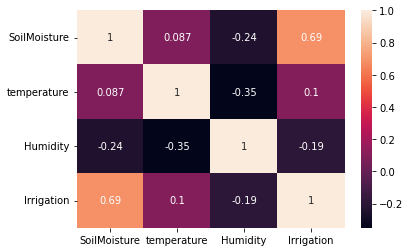

In [ ]:
sns.heatmap(df.corr(),annot=True)

Separating features and target label

In [ ]:
features = df[['SoilMoisture','temperature', 'Humidity']]
target = df['Irrigation']
labels = df['Irrigation']

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# **kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(Xtrain,Ytrain)
predicted_values = knn.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('knn')
print("knn's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

knn's Accuracy is:  0.9601990049751243
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       116
           1       0.98      0.93      0.95        85

    accuracy                           0.96       201
   macro avg       0.96      0.96      0.96       201
weighted avg       0.96      0.96      0.96       201



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (knn)
score = cross_val_score(knn, features, target,cv=5)

In [ ]:
score

array([0.8159204 , 0.97014925, 0.815     , 0.83      , 0.88      ])

# **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  86.06965174129353
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       116
           1       0.93      0.73      0.82        85

    accuracy                           0.86       201
   macro avg       0.88      0.84      0.85       201
weighted avg       0.87      0.86      0.86       201



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.8159204 , 0.97014925, 0.815     , 0.83      , 0.88      ])

# **Guassian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.8706467661691543
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       116
           1       0.85      0.85      0.85        85

    accuracy                           0.87       201
   macro avg       0.87      0.87      0.87       201
weighted avg       0.87      0.87      0.87       201



In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.76119403, 0.86069652, 0.8       , 0.775     , 0.875     ])

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.8059701492537313
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       116
           1       0.86      0.65      0.74        85

    accuracy                           0.81       201
   macro avg       0.82      0.78      0.79       201
weighted avg       0.81      0.81      0.80       201



In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.79104478, 0.83084577, 0.83      , 0.76      , 0.91      ])

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.835820895522388
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       116
           1       0.92      0.67      0.78        85

    accuracy                           0.84       201
   macro avg       0.86      0.81      0.82       201
weighted avg       0.85      0.84      0.83       201



In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.75621891, 0.85074627, 0.82      , 0.76      , 0.925     ])

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)
predicted_values = RF.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9751243781094527
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       116
           1       0.98      0.96      0.97        85

    accuracy                           0.98       201
   macro avg       0.98      0.97      0.97       201
weighted avg       0.98      0.98      0.98       201



# **XGBoost**

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)
predicted_values = XB.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9253731343283582
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       116
           1       0.93      0.89      0.91        85

    accuracy                           0.93       201
   macro avg       0.93      0.92      0.92       201
weighted avg       0.93      0.93      0.93       201



In [ ]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.85572139, 0.960199  , 0.84      , 0.905     , 0.915     ])

# **Accuracy Comparison**

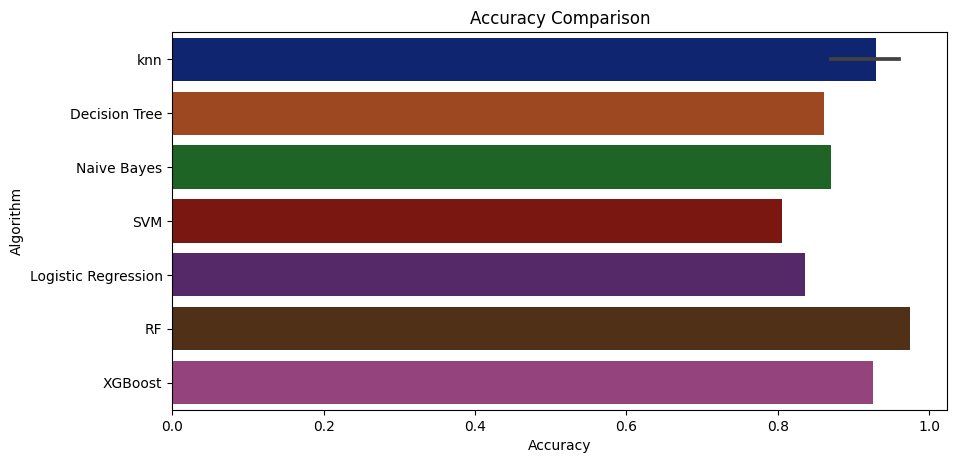

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')


In [ ]:
data = np.array([[540,29,18]])
prediction = knn.predict(data)
print(prediction)

[1]


In [ ]:
data = np.array([[100,19,15]])
prediction = RF.predict(data)
print(prediction)

[0]
